In [40]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [41]:
def show(mat):
    plt.imshow(cv.cvtColor(mat.astype(np.uint8), cv.COLOR_BGR2RGB))
    
def mask(imgshape):
    height = imgshape[0]
    width = imgshape[1]
    maskpts = np.array([[width//3, height//2], [2*width//3, height//2], [3*width//4, height], [width//4, height]])
    return cv.fillPoly(np.zeros(imgshape), pts=[maskpts], color=(255,255,255)).astype(np.uint8)

def correctionmask(imgshape, padding):
    padding = int(padding)
    height = imgshape[0]
    width = imgshape[1]
    maskpts = np.array([[width//3+padding, height//2+padding], [2*width//3-padding, height//2+padding], [3*width//4+padding, height], [width//4-padding, height]])
    return cv.fillPoly(np.zeros(imgshape), pts=[maskpts], color=(255,255,255)).astype(np.uint8)

In [50]:
ret, thresh = cv.threshold(cv.cvtColor(cv.imread('road.jpeg'), cv.COLOR_BGR2GRAY), 210, 255, 0) # get binary image
frame = cv.bitwise_and(thresh, mask(thresh.shape))

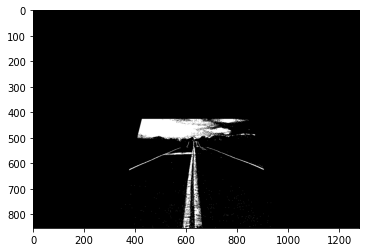

In [51]:
show(frame) # now we have the preprocessed binary image ready to detect countours

In [52]:
# find and draw contours
contours, h= cv.findContours(frame, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
frame = cv.drawContours(np.zeros(frame.shape, dtype=np.uint8), contours, -1, (255,255,255), 3)

# Apply correction mask

frame = cv.bitwise_and(frame, correctionmask(frame.shape, 10))

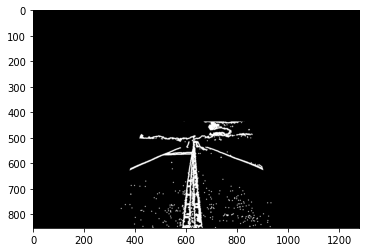

In [53]:
show(frame)

In [68]:
# find and draw lines

lines = cv.HoughLinesP(frame, 1, np.pi / 180, 300, None, 50, 10)

lines_img = np.zeros(frame.shape, dtype=np.uint8)
if lines is not None:
    for i in range(0, len(lines)):
        l = lines[i][0]
        cv.line(lines_img, (l[0], l[1]), (l[2], l[3]), (255,255,255), 3, cv.LINE_AA)

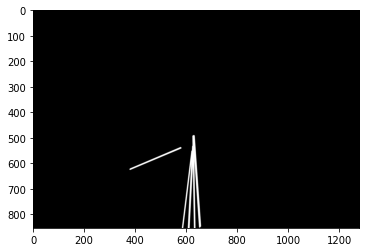

In [69]:
show(lines_img)

In [75]:
capture = cv.VideoCapture("test2.mp4")
frame = cv.cvtColor(capture.read()[1],cv.COLOR_BGR2GRAY)

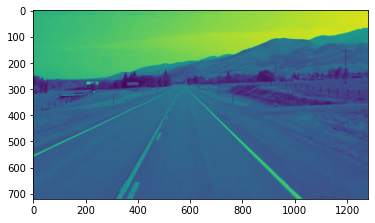

In [78]:
plt.imshow(frame)